# Data Project

In [148]:
import numpy as np
import pandas as pd
import pytrends
import matplotlib.pyplot as plt

In [149]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(['covid','coronavirus'], cat=0, timeframe='2020-04-12 2020-06-27', geo='US', gprop='')

In [193]:
# time series of number of searches
search_by_time = pytrends.interest_over_time()

In [133]:
# COVID-19 database from JHU github
JHU_list = []
url_base = 'https://raw.githubusercontent.com/CSSEGISandData/\
COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
dates = pd.date_range('2020-04-12','2020-06-27',freq='D')
for D in dates:
    date_str = D.strftime('%m-%d-%Y')
    url = url_base + date_str + '.csv'
    # get data from JHU repository
    df = pd.read_csv(url)
    df['date'] = pd.date_range(date_str, periods=1).repeat(len(df))
    JHU_list.append(df)
# aggregate data from all dates
JHU_data = pd.concat(JHU_list)
JHU_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/\
COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [136]:
# find confirmed cases
daily_cases = JHU_data.loc[:,['date','Confirmed']].groupby('date').sum()
daily_cases['New'] = daily_cases['Confirmed'].sub(daily_cases['Confirmed'].shift())

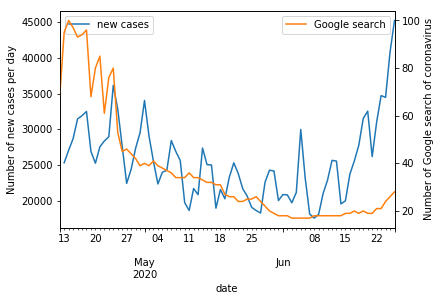

In [194]:
# plot data
result = pd.merge(daily_cases['New'],search_by_time['coronavirus'],on='date')
result.rename(columns={'New':'new cases','coronavirus':'Google search'})
# daily_cases['New']
# search_by_time['coronavirus']
# plt.figure()
ax = result.plot(secondary_y=['coronavirus'])
ax.legend(['new cases'],loc=2)
ax.right_ax.legend(['Google search'],loc=1)
ax.set_ylabel('Number of new cases per day')
ax.right_ax.set_ylabel('Number of Google search of coronavirus')
plt.savefig('new_case_google_search.png')

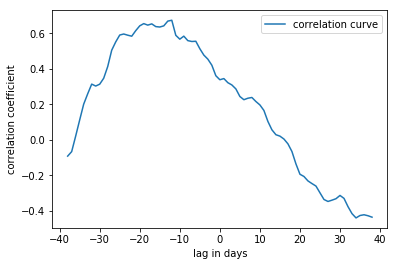

In [195]:
# plot crosscorrelation
Ndays = len(result)
day_lag = [i for i in range(-Ndays//2,Ndays//2+1)]
corr = [result['New'].corr(result['coronavirus'].shift(i)) for i in day_lag]
plt.plot(day_lag,corr)
plt.xlabel('lag in days')
plt.ylabel('correlation coefficient')
plt.legend(['correlation curve'])
plt.savefig('time_laged_correlation_curve.png')